In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('players_stats.csv')

cleanData = data[pd.notnull(data['Experience'])]

In [105]:
data_features = cleanData.iloc[:, 1:24]
data_labels = cleanData.iloc[:, 28]
data_labels2 = cleanData.iloc[:, 33]
data_labels3 = cleanData.iloc[:, 24]

In [106]:
from sklearn import preprocessing

x = data_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_features = pd.DataFrame(x_scaled)

In [107]:
data_features = data_features.values
#yrs in league
data_labels = data_labels.values
#bmi
data_labels2 = data_labels2.values
#age
data_labels3 = data_labels3.values

for x in range(422):
    if str(data_labels[x]) == 'R':
        data_labels[x] = 0

In [108]:
from sklearn.preprocessing import normalize

data_labels = normalize(data_labels[:,np.newaxis], axis=0).ravel()
data_labels2 = normalize(data_labels2[:,np.newaxis], axis=0).ravel()
data_labels3 = normalize(data_labels3[:,np.newaxis], axis=0).ravel()

In [70]:
def plot_embedding(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [71]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [72]:
def mapLabels(clust, trainlabel, numclust):
    labels = np.zeros_like(clust)
    for i in range(numclust):
        mask = (clust == i)
        labels[mask] = stats.mode(trainlabel[mask])[0]
    return labels

In [74]:
data_features = pd.DataFrame(data_features)
data_labels = pd.DataFrame(data_labels)
data_labels2 = pd.DataFrame(data_labels2)
data_labels3 = pd.DataFrame(data_labels3)

In [85]:
subSpace = PCA(n_components=2).fit_transform(data_features.values)

Shape of cluster centers: (10, 23)
Shape of labels created by clusters: (422,)


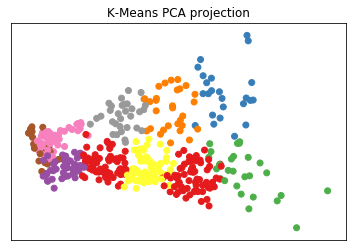

In [86]:
kmeans = KMeans(n_clusters=10).fit(data_features)
print('Shape of cluster centers:', kmeans.cluster_centers_.shape)
print('Shape of labels created by clusters:', kmeans.labels_.shape)

plot_embedding(subSpace, kmeans.labels_, 'K-Means PCA projection')

Number of Leaves: 422
Number of Connected Components 1


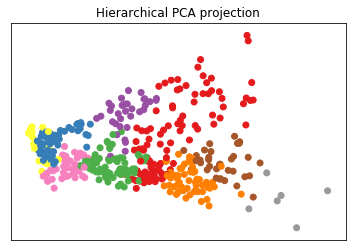

In [87]:
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(data_features)
wlabel = ward.labels_
print('Number of Leaves:', ward.n_leaves_)
print('Number of Connected Components', ward.n_components_)

plot_embedding(subSpace, wlabel, 'Hierarchical PCA projection')

In [88]:
subSpace1 = TSNE(n_components=3).fit_transform(data_features.values)

Shape of cluster centers: (10, 23)
Shape of labels created by clusters: (422,)


<Figure size 432x288 with 0 Axes>

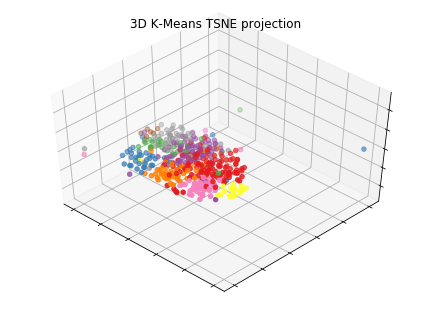

In [89]:
kmeans = KMeans(n_clusters=10).fit(data_features)
print('Shape of cluster centers:', kmeans.cluster_centers_.shape)
print('Shape of labels created by clusters:', kmeans.labels_.shape)

plot_embedding3d(subSpace1, kmeans.labels_, '3D K-Means TSNE projection')

Number of Leaves: 422
Number of Connected Components 1


<Figure size 432x288 with 0 Axes>

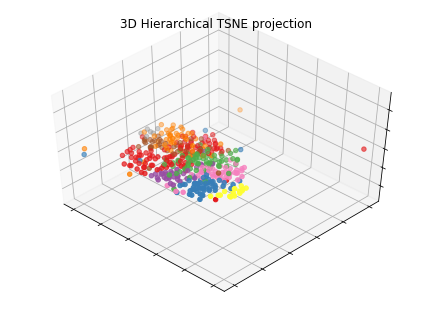

In [90]:
ward = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(data_features)
wlabel = ward.labels_
print('Number of Leaves:', ward.n_leaves_)
print('Number of Connected Components', ward.n_components_)

plot_embedding3d(subSpace1, wlabel, '3D Hierarchical TSNE projection')

In [92]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

subSpace2 = TSNE(n_components=1).fit_transform(data_features.values)
subSpace3 = TSNE().fit_transform(data_features.values)

In [93]:
data_features = data_features.values
#yrs in league
data_labels = data_labels.values
#bmi
data_labels2 = data_labels2.values
#age
data_labels3 = data_labels3.values

Coefficients: 
 [-0.00057379]
Mean squared error: 0.00
Variance score: -0.01


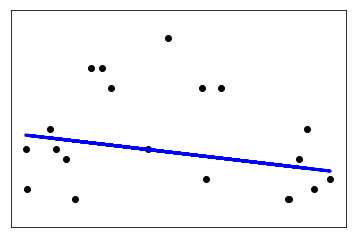

Coefficients: 
 [-5.976147e-06]
Mean squared error: 0.00
Variance score: 0.01


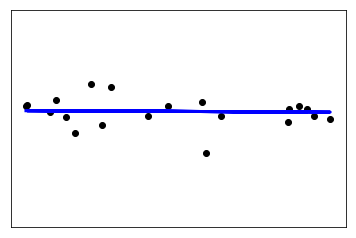

Coefficients: 
 [-5.3817537e-05]
Mean squared error: 0.00
Variance score: -0.03


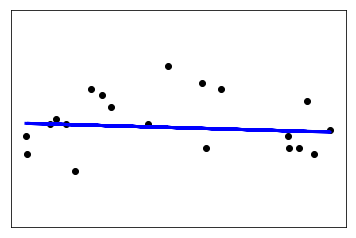

In [109]:
X_train = subSpace2[:-20]
X_test = subSpace2[-20:]

# Split the targets into training/testing sets
y_train = data_labels3[:-20]
y_test = data_labels3[-20:]

for x in range(3):
    if x == 0:
        y_train = data_labels[:-20]
        y_test = data_labels[-20:]
    if x == 1:
        y_train = data_labels2[:-20]
        y_test = data_labels2[-20:]
    if x == 2:
        y_train = data_labels3[:-20]
        y_test = data_labels3[-20:]

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))

    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.209182e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.233558e-20
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.396638e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.113182e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6

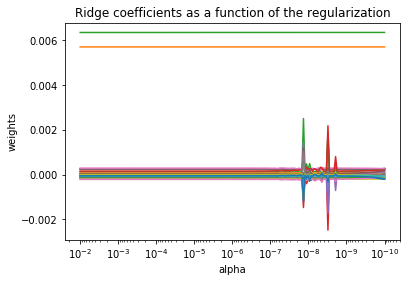

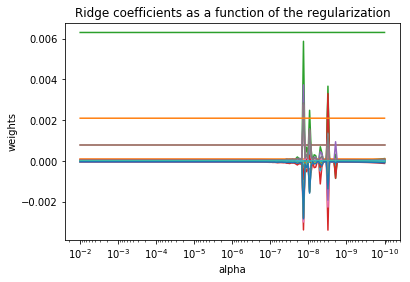

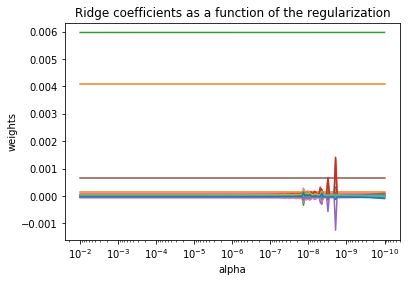

In [112]:
from sklearn import linear_model

Olddata_features = cleanData.iloc[:, 1:24]
X = Olddata_features.values

for x in range(3):
    if x == 0:
        y = data_labels
    if x == 1:
        y = data_labels2
    if x == 2:
        y = data_labels3

    n_alphas = 200
    alphas = np.logspace(-10, -2, n_alphas)

    coefs = []
    for a in alphas:
        ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
        ridge.fit(X, y)
        coefs.append(ridge.coef_)

    ax = plt.gca()

    ax.plot(alphas, coefs)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.014368
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.014368


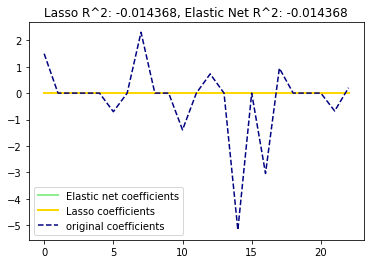

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.015478
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.015478


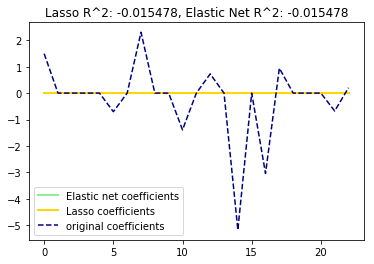

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.002217
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : -0.002217


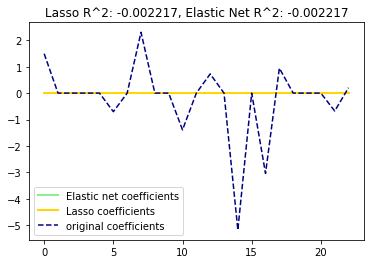

In [117]:
from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = len(data_features), len(data_features[0])
X = data_features
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
for x in range(3):
    if x == 0:
        y = data_labels
    if x == 1:
        y = data_labels2
    if x == 2:
        y = data_labels3

    # add noise
    y += 0.01 * np.random.normal(size=n_samples)

    # Split data in train set and test set
    n_samples = X.shape[0]
    X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
    X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

    # #############################################################################
    # Lasso
    from sklearn.linear_model import Lasso

    alpha = 0.1
    lasso = Lasso(alpha=alpha)

    y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    print(lasso)
    print("r^2 on test data : %f" % r2_score_lasso)

    # #############################################################################
    # ElasticNet
    from sklearn.linear_model import ElasticNet

    enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

    y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
    r2_score_enet = r2_score(y_test, y_pred_enet)
    print(enet)
    print("r^2 on test data : %f" % r2_score_enet)

    plt.plot(enet.coef_, color='lightgreen', linewidth=2,label='Elastic net coefficients')
    plt.plot(lasso.coef_, color='gold', linewidth=2,label='Lasso coefficients')
    plt.plot(coef, '--', color='navy', label='original coefficients')
    plt.legend(loc='best')
    plt.title("Lasso R^2: %f, Elastic Net R^2: %f"% (r2_score_lasso, r2_score_enet))
    plt.show()

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


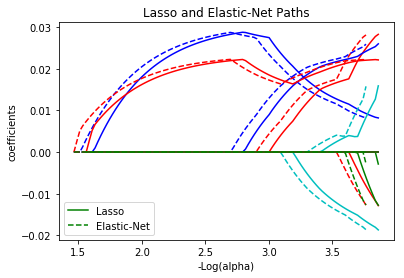

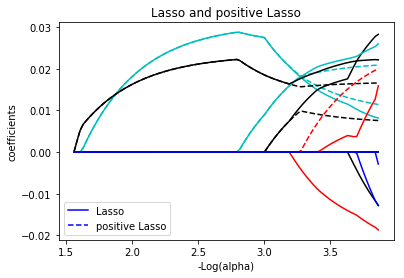

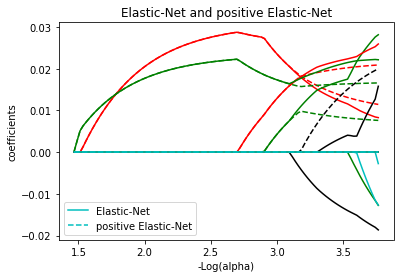

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


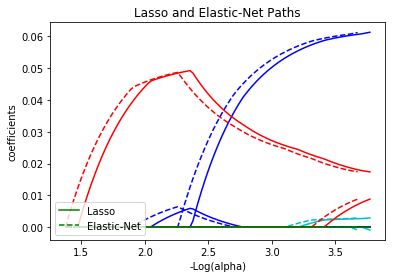

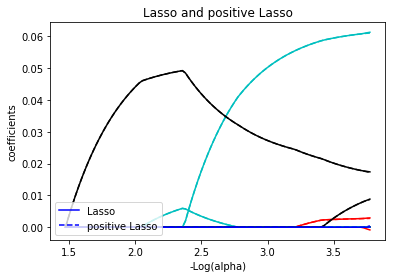

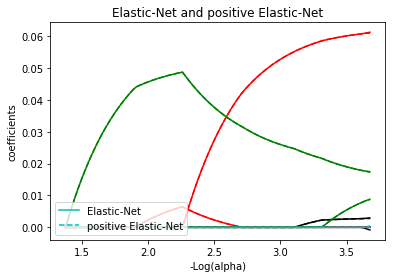

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


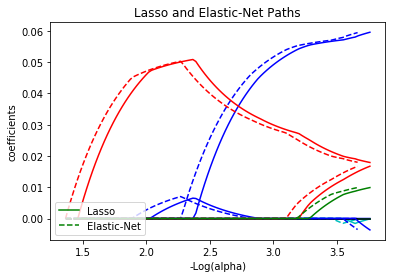

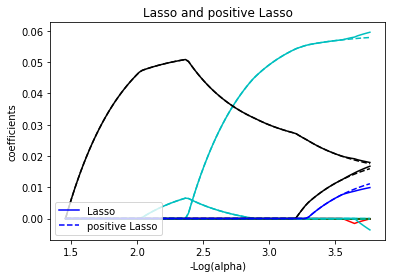

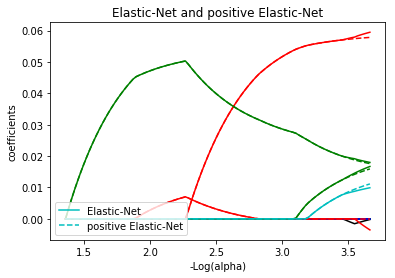

In [119]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets

X = data_features

#X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths
for x in range(3):
    if x == 0:
        y = data_labels
    if x == 1:
        y = data_labels2
    if x == 2:
        y = data_labels3

    eps = 5e-3  # the smaller it is the longer is the path

    print("Computing regularization path using the lasso...")
    alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)

    print("Computing regularization path using the positive lasso...")
    alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
        X, y, eps, positive=True, fit_intercept=False)
    print("Computing regularization path using the elastic net...")
    alphas_enet, coefs_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

    print("Computing regularization path using the positive elastic net...")
    alphas_positive_enet, coefs_positive_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

    # Display results

    plt.figure(1)
    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas_lasso = -np.log10(alphas_lasso)
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and Elastic-Net Paths')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
    plt.axis('tight')


    plt.figure(2)
    neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
    for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and positive Lasso')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
    plt.axis('tight')


    plt.figure(3)
    neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
    for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
        l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
        l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Elastic-Net and positive Elastic-Net')
    plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
               loc='lower left')
    plt.axis('tight')
    plt.show()